In Transfer Learning, we use pretrained models in order to build our use cases. The pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset.

In this example we will be using a pretrained model called <b>Mobilenetv2.</b>

It gives better accuracy, compared with training a model from scratch.

In [3]:
#configuring path of kaggle.json file 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Importing Dog vs Cat dataset from kaggle



In [7]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:05<00:00, 175MB/s]
100% 812M/812M [00:05<00:00, 169MB/s]


In [8]:
#extract the compressed dataset
from zipfile import ZipFile

In [10]:
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [11]:
dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [12]:
#importing number of files in train folder
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [13]:
#Printing names of images
file_names = os.listdir('/content/train/')
print(file_names)

['dog.3659.jpg', 'cat.5899.jpg', 'dog.6162.jpg', 'dog.4296.jpg', 'cat.9756.jpg', 'cat.7900.jpg', 'cat.5571.jpg', 'dog.1355.jpg', 'cat.5608.jpg', 'dog.1289.jpg', 'cat.8675.jpg', 'dog.7097.jpg', 'cat.2139.jpg', 'dog.12351.jpg', 'cat.828.jpg', 'dog.8796.jpg', 'dog.2583.jpg', 'cat.847.jpg', 'dog.1132.jpg', 'cat.12489.jpg', 'dog.7995.jpg', 'cat.4519.jpg', 'cat.12317.jpg', 'dog.6491.jpg', 'dog.12303.jpg', 'cat.12446.jpg', 'cat.4077.jpg', 'cat.4814.jpg', 'dog.6461.jpg', 'dog.8286.jpg', 'dog.4883.jpg', 'cat.12422.jpg', 'dog.2916.jpg', 'dog.5963.jpg', 'dog.7993.jpg', 'dog.8680.jpg', 'cat.10775.jpg', 'cat.3247.jpg', 'dog.5847.jpg', 'cat.8521.jpg', 'cat.559.jpg', 'dog.6102.jpg', 'dog.805.jpg', 'dog.4851.jpg', 'cat.4948.jpg', 'cat.8599.jpg', 'cat.572.jpg', 'cat.310.jpg', 'cat.12119.jpg', 'dog.7416.jpg', 'dog.3453.jpg', 'cat.1978.jpg', 'dog.8151.jpg', 'dog.310.jpg', 'dog.6392.jpg', 'dog.2061.jpg', 'dog.10518.jpg', 'cat.4250.jpg', 'cat.6410.jpg', 'cat.3705.jpg', 'cat.5142.jpg', 'dog.11182.jpg', 'cat

## Importing Packages

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying Images of dogs

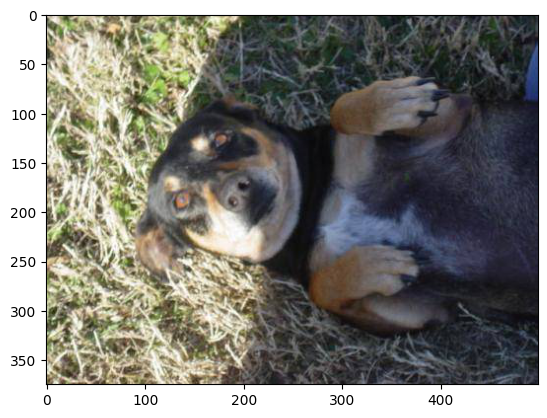

In [20]:
img_dog = mpimg.imread('/content/train/dog.6162.jpg')
plt.imshow(img_dog)

Displaying images of cats

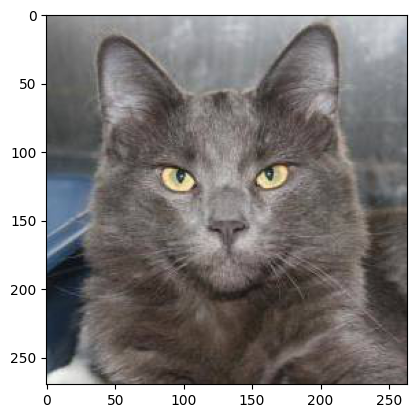

In [21]:
img_cat = mpimg.imread('/content/train/cat.5899.jpg')
plt.imshow(img_cat)

In [24]:
#Extracting names of first 5 photos
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


dog
cat
dog
dog
cat


In [27]:
#Counting the number of dogs and cats

file_names = os.listdir('/content/train')

count_cat = 0
count_dog = 0

for i in file_names:
  if i[0:3] == 'dog':
    count_dog += 1
  elif i[0:3] == 'cat':
    count_cat += 1

print("Number of cats: ",count_cat)
print("Number of dogs: ",count_dog)



Number of cats:  12500
Number of dogs:  12500


## Resizing Images

In [43]:
#creating a folder to store all resized images
os.mkdir('/content/image_resized')


In [45]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  file_names = os.listdir(original_folder)[i]
  img_path = original_folder + file_names

  img = Image.open(img_path) #we get the path of images from the original folder
  img = img.resize((224,224)) #set the pixel dimensions
  img = img.convert('RGB')#convert the images to RGB format

  newImgPath = resized_folder+file_names #get the new path name
  img.save(newImgPath) #save the images resized into this new path


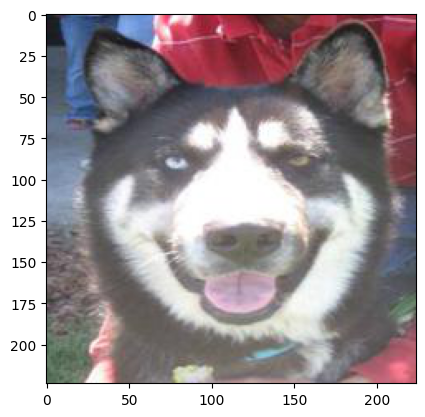

In [48]:
#example for a dog
img = mpimg.imread('/content/image_resized/dog.10016.jpg')
plt.imshow(img)

In [52]:
file_names = os.listdir(resized_folder)

#run a loop for only 2000 images (sample) Assigning labels to the images

labels = []


for i in range(2000):
  file_name = os.listdir(resized_folder)[i]
  label = file_name[0:3]
  
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [53]:
print(len(labels)) #here we store cats as 0 and dogs as 1 for a more accurate classification

2000


In [54]:
#counting unique values of dogs and cat
values, counts = np.unique(labels, return_counts = True)

In [55]:
print(values,"   ",counts) #972 cats and 1028 dogs

[0 1]     [ 972 1028]


Converting resized images to numpy arrays

In [56]:
import cv2
import glob

In [64]:
image_dir = '/content/image_resized/'
image_format = ['png','jpg']

In [65]:
files = []

[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_format] #saving a list with all directories

dog_cat_images_array = np.asarray([cv2.imread(file) for file in files])#this list we created we store them as numpy arrays

In [67]:
print(dog_cat_images_array.shape) #2000 images, 224x224 the dimensions and 3 represents the RGB image (red,green,blue)

(2000, 224, 224, 3)


## Splitting Data

In [68]:
X = dog_cat_images_array
y = np.asarray(labels)

In [69]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
#Scaling the Data
X_train = X_train / 255 
X_test = X_test / 255

In [71]:
X_train

array([[[[0.83529412, 0.85490196, 0.86666667],
         [0.80392157, 0.82352941, 0.83529412],
         [0.80784314, 0.82352941, 0.82745098],
         ...,
         [0.48235294, 0.47843137, 0.4627451 ],
         [0.38431373, 0.38039216, 0.36470588],
         [0.44313725, 0.43921569, 0.42352941]],

        [[0.79607843, 0.81568627, 0.82745098],
         [0.84313725, 0.8627451 , 0.8745098 ],
         [0.81568627, 0.83137255, 0.83529412],
         ...,
         [0.49803922, 0.49411765, 0.47843137],
         [0.43529412, 0.43137255, 0.41568627],
         [0.45098039, 0.44705882, 0.43137255]],

        [[0.78431373, 0.80392157, 0.81568627],
         [0.85490196, 0.8745098 , 0.88627451],
         [0.81960784, 0.83529412, 0.83921569],
         ...,
         [0.48627451, 0.47843137, 0.4745098 ],
         [0.45882353, 0.45098039, 0.44705882],
         [0.43921569, 0.43137255, 0.42745098]],

        ...,

        [[0.36470588, 0.38039216, 0.38431373],
         [0.49411765, 0.50980392, 0.51372549]

## Building a neural network using a pretrained model

In [72]:
import tensorflow as tf
import tensorflow_hub as hub


In [73]:
modelnet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' #the path where pretrained_model is taken

pretrained_model = hub.KerasLayer(modelnet_model, input_shape = (224,224,3), trainable = False) #the model

In [74]:
#number of classes is reponsible for number of image kinds (cats and dogs; 0 and 1) so it will be 2
num_classes = 2

#creating the model among the pretrained_model
model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [75]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [76]:
model.fit(X_train, y_train, epochs = 8)

Epoch 1/8
50/50 [==============================] - 66s 1s/step - loss: 0.2536 - accuracy: 0.8963
Epoch 2/8
50/50 [==============================] - 55s 1s/step - loss: 0.0864 - accuracy: 0.9744
Epoch 3/8
50/50 [==============================] - 55s 1s/step - loss: 0.0649 - accuracy: 0.9825
Epoch 4/8
50/50 [==============================] - 57s 1s/step - loss: 0.0547 - accuracy: 0.9856
Epoch 5/8
50/50 [==============================] - 55s 1s/step - loss: 0.0461 - accuracy: 0.9912
Epoch 6/8
50/50 [==============================] - 55s 1s/step - loss: 0.0410 - accuracy: 0.9887
Epoch 7/8
50/50 [==============================] - 53s 1s/step - loss: 0.0356 - accuracy: 0.9937
Epoch 8/8
50/50 [==============================] - 53s 1s/step - loss: 0.0322 - accuracy: 0.9925


In [77]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 14s 1s/step - loss: 0.0780 - accuracy: 0.9750


[0.07798490673303604, 0.9750000238418579]

## Building a Predictive System

Path to be entered: /content/train/dog.0.jpg


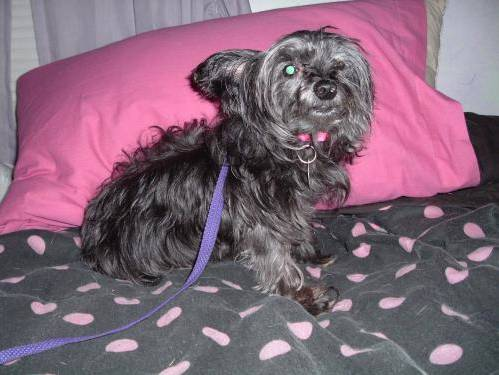

1/1 [==============================] - 0s 84ms/step
[[-0.73577625  2.4430943 ]]
The image represents a dog


In [83]:
#path of the image

img_path = input("Path to be entered: ")

input_img = cv2.imread(img_path) #reading the path entered in the console

img = cv2_imshow(input_img)

input_image_resize = cv2.resize(input_img, (224,224)) #resizing the image read

input_image_resize_scaled = input_image_resize / 255 #scaling the image

image_reshaped = np.reshape(input_image_resize_scaled, [1,224,224,3]) #reshaping the image 
 
input_pred = model.predict(image_reshaped)

print(input_pred) #it will return an array of probabilities

if np.argmax(input_pred) == 0:
  print("The image represents a cat")
else:
  print("The image represents a dog")